In [1]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using FUSE.IMAS
using Plots; gr();

  Activating environment at `~/Coding/julia/FUSE/Project.toml`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1317


In [2]:
dd = IMAS.json2imas("/Users/meneghini/.julia/dev/FUSE/sample/CAT_eq_ods.json");
plot(dd.equilibrium.time_slice[1])
IMAS.flux_surfaces(dd.equilibrium);

 14.135667 seconds (62.36 M allocations: 3.266 GiB, 5.39% gc time, 95.75% compilation time)


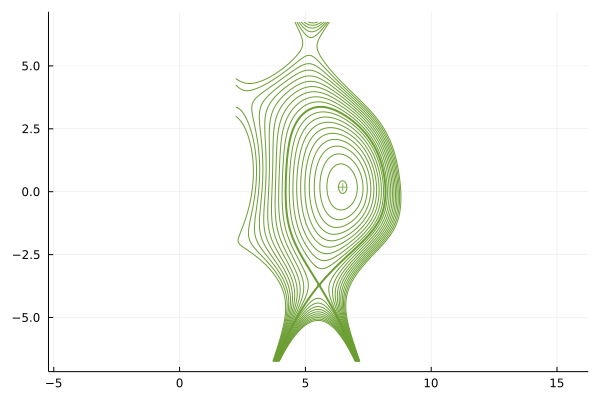

In [3]:
ϵ = 0.32
κ = 1.7
δ = 0.3
R0 = 6.2
B0 = 5.3
ip = 15.E6
beta_n = 3.0
x_point=true
symmetric=true

resolution = 129

dd = IMAS.dd()
resize!(dd.equilibrium.time_slice,1)
FUSE.init(dd.equilibrium.time_slice[1]; B0, R0, ϵ, δ, κ, beta_n, ip, x_point=x_point)

eqactor = FUSE.SolovevEquilibriumActor(dd.equilibrium.time_slice[1], symmetric=symmetric)
@time FUSE.step(eqactor)
dd.equilibrium.time_slice[1] = FUSE.finalize(eqactor, resolution, (maximum([R0*(1-ϵ*2),0.0]), R0*(1+ϵ*2)), (-R0*ϵ*κ*2, R0*ϵ*κ*2));
dd.equilibrium.time=[0.0]
dd.equilibrium.vacuum_toroidal_field.r0=R0
dd.equilibrium.vacuum_toroidal_field.b0=[B0]

plot(dd.equilibrium.time_slice[1])

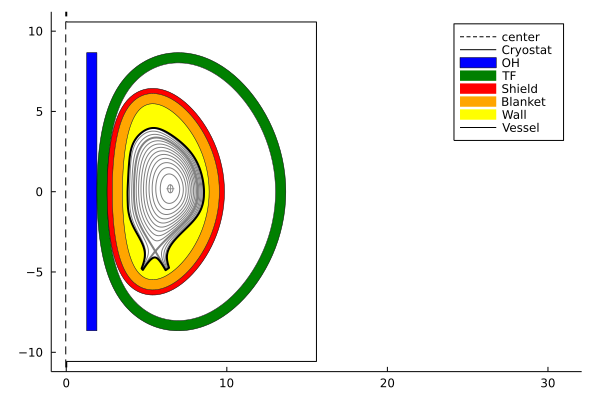

  0.002070 seconds (430 allocations: 35.391 KiB, 94.87% compilation time)


In [5]:
rb=IMAS.radial_build()
eqt=dd.equilibrium.time_slice[1]

rbactor = FUSE.init(rb, eqt, is_nuclear_facility=true,conformal_wall=true);
@time FUSE.step(rbactor)
dd.radial_build = FUSE.finalize(rbactor)

plot(eqt,color=:gray)
display(plot!(rb,outline=true))

In [6]:
rb;

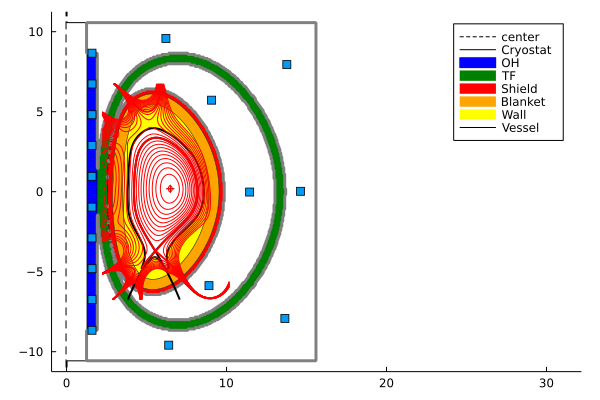

In [38]:
pfoptactor = PFcoilsOptActor(dd.equilibrium,dd.radial_build, 10, [3,5],1E-30);
plot(rb)
display(plot!(pfoptactor))

#step(pfoptactor, λ_currents=1E7, verbose=true, symmetric=false)
#display(plot(pfoptactor))
#contourf(rmask,zmask,transpose(log10.(1E-1 .+ mask)),aspect_ratio=:equal,xlim=xlim,ylim=ylim)